In [1]:
import pandas as pd
import pvlib
from pvlib.location import Location

In [2]:
tidszone = "Europe/Copenhagen"
start_dato = "2024-04-01"
slut_dato = "2024-04-30"
delta_tid = "1H"  # "Min", "1H",

# Definition of Location object. Coordinates and elevation of Amager, Copenhagen (Denmark)
site = Location(
    55.7860, 12.5236, tidszone, 30, "DTU Lyngby"
)  # latitude, longitude, time_zone, altitude, name

# Definition of a time range of simulation
times = pd.date_range(
    start_dato + " 00:00:00", slut_dato + " 23:59:59", inclusive="left", freq=delta_tid, tz=tidszone
)

C:\Users\laura\AppData\Local\Temp\ipykernel_65308\2032090636.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  times = pd.date_range(


In [3]:
# Estimate Solar Position with the 'Location' object
solpos = site.get_solarposition(times)

# Visualize the resulting DataFrame
solpos.head()

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2024-04-01 00:00:00+02:00,117.721563,117.721563,-27.721563,-27.721563,339.131058,-3.866396
2024-04-01 01:00:00+02:00,119.518759,119.518759,-29.518759,-29.518759,356.058270,-3.854027
2024-04-01 02:00:00+02:00,118.822805,118.822805,-28.822805,-28.822805,13.180507,-3.841662
2024-04-01 03:00:00+02:00,115.725874,115.725874,-25.725874,-25.725874,29.654759,-3.829301
2024-04-01 04:00:00+02:00,110.601093,110.601093,-20.601093,-20.601093,44.948514,-3.816944


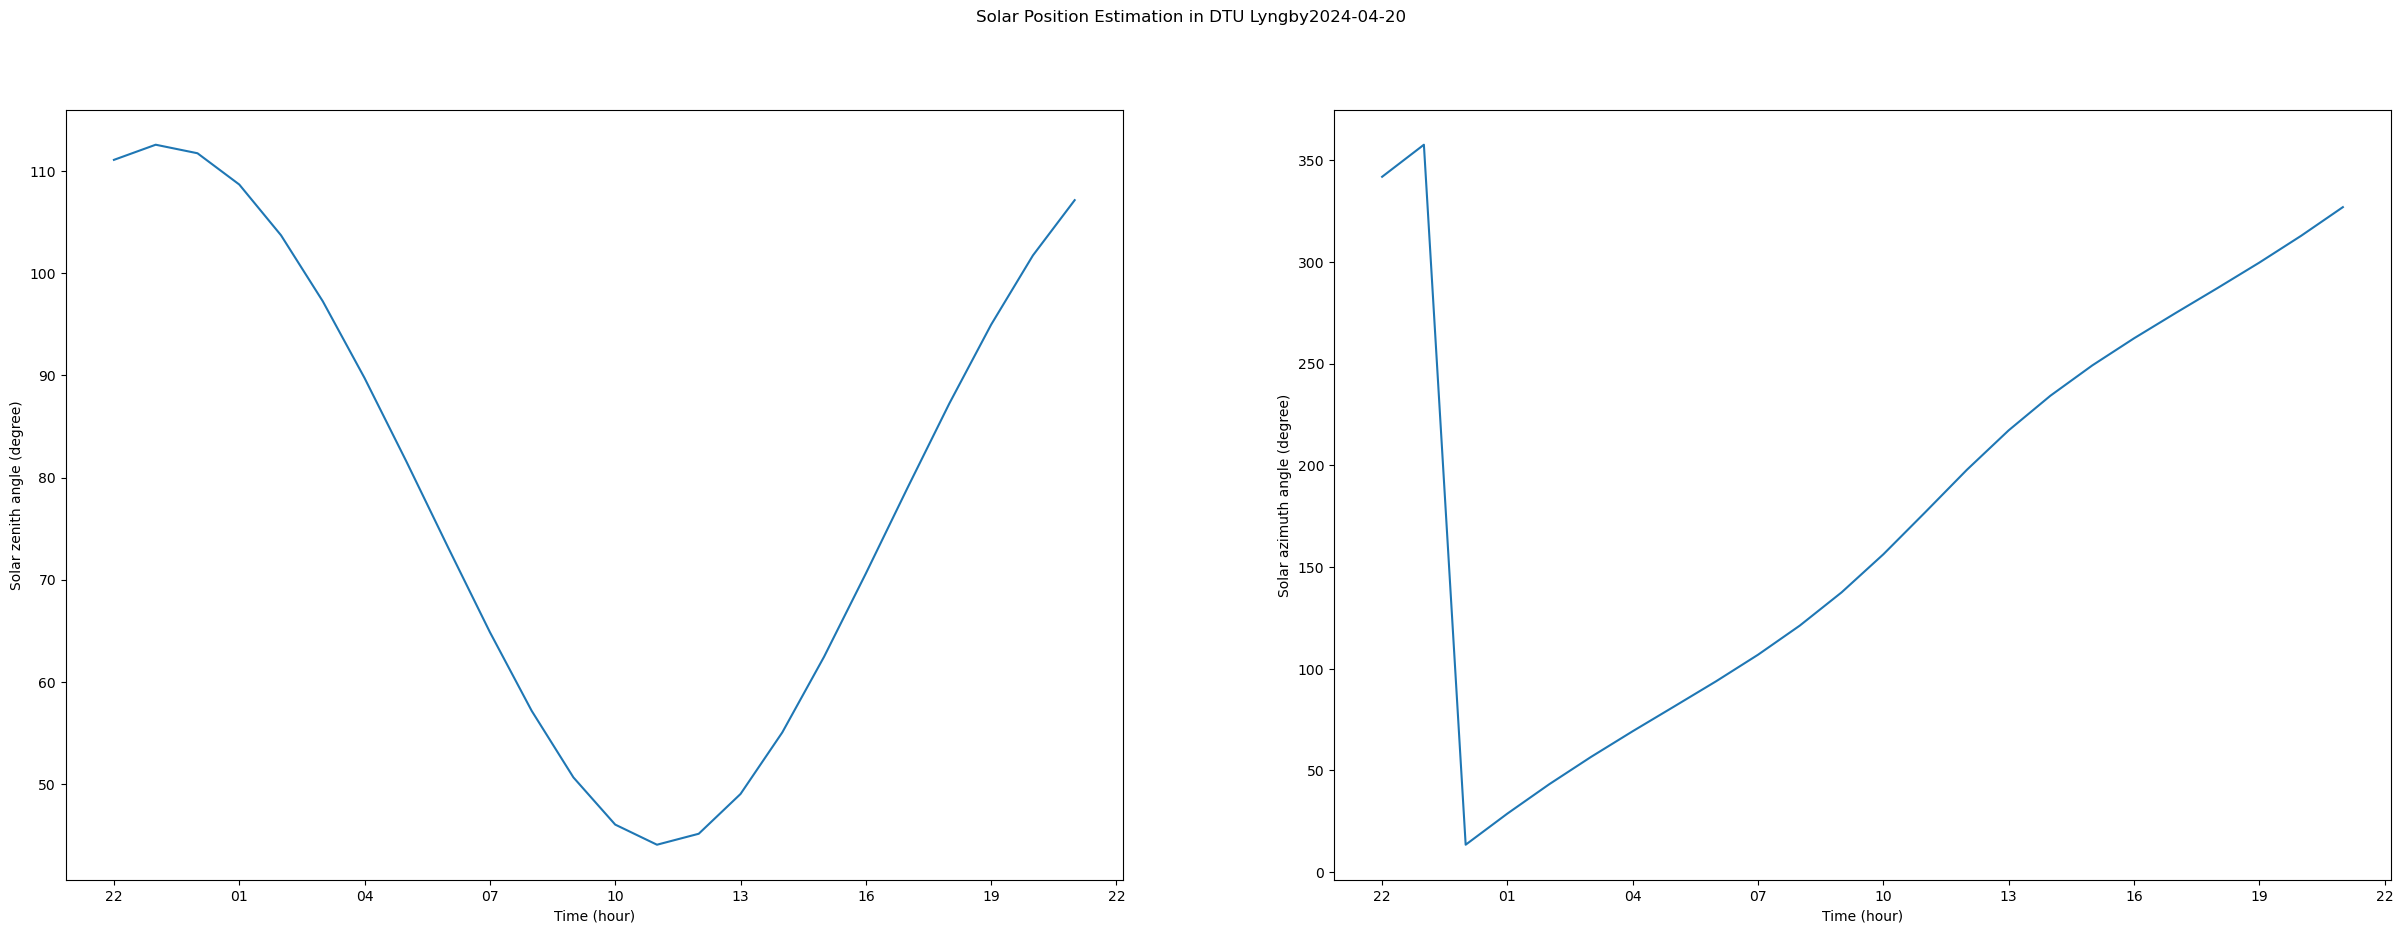

In [4]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

valgt_dato = "2024-04-20"

# Plots for solar zenith and solar azimuth angles
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle("Solar Position Estimation in " + site.name + valgt_dato)

# plot for solar zenith angle
ax1.plot(solpos.loc[valgt_dato].zenith)
ax1.set_ylabel("Solar zenith angle (degree)")
ax1.set_xlabel("Time (hour)")
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

# plot for solar azimuth angle
ax2.plot(solpos.loc[valgt_dato].azimuth)
ax2.set_ylabel("Solar azimuth angle (degree)")
ax2.set_xlabel("Time (hour)")
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

In [5]:
valgt_dato = "2024-04-20"
print(solpos.loc[valgt_dato].zenith)
print(solpos.loc[valgt_dato].elevation)
print(solpos.loc[valgt_dato].azimuth)

2024-04-20 00:00:00+02:00    111.108023
2024-04-20 01:00:00+02:00    112.590674
2024-04-20 02:00:00+02:00    111.755352
2024-04-20 03:00:00+02:00    108.695293
2024-04-20 04:00:00+02:00    103.722712
2024-04-20 05:00:00+02:00     97.260249
2024-04-20 06:00:00+02:00     89.744400
2024-04-20 07:00:00+02:00     81.582637
2024-04-20 08:00:00+02:00     73.158349
2024-04-20 09:00:00+02:00     64.865924
2024-04-20 10:00:00+02:00     57.164775
2024-04-20 11:00:00+02:00     50.639699
2024-04-20 12:00:00+02:00     46.020998
2024-04-20 13:00:00+02:00     44.049686
2024-04-20 14:00:00+02:00     45.123571
2024-04-20 15:00:00+02:00     49.016768
2024-04-20 16:00:00+02:00     55.045922
2024-04-20 17:00:00+02:00     62.451800
2024-04-20 18:00:00+02:00     70.603281
2024-04-20 19:00:00+02:00     79.008633
2024-04-20 20:00:00+02:00     87.259466
2024-04-20 21:00:00+02:00     94.972989
2024-04-20 22:00:00+02:00    101.750845
2024-04-20 23:00:00+02:00    107.164306
Freq: h, Name: zenith, dtype: float64
20

In [6]:
import numpy as np
elvation = np.array(solpos.loc[valgt_dato].elevation)
zenith = np.array(solpos.loc[valgt_dato].zenith)
azimuth = np.array(solpos.loc[valgt_dato].azimuth)

In [7]:
#Maksimum for a_s (sol_højest) og tidspunkt
sol_højest = solpos.loc[valgt_dato].elevation.max()
tidspunkt = solpos.loc[valgt_dato].elevation.idxmax()

print(f"Solen står højest den {valgt_dato} kl. {tidspunkt.strftime('%H:%M')} med en elevation på {sol_højest:.2f}°")

#Når a_s < 0 eller \theta_s > 90\degree, så betyder det at solen ikke kan ses (altså at det er nat)


Solen står højest den 2024-04-20 kl. 13:00 med en elevation på 45.95°
